In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:/Users/ascen/Documents/Avicola/data/")

In [3]:
df=pd.read_csv('datos_pollitos.csv', sep=",")
df.head()

,id_lectura,modulo,hora,temperatura,humedad,O2,CO,CO2,NH3
0,2025-03-03T00:40:53.425_M1,1,2025-03-03 06:40:53,30.5,34,NaN,1611,1793,2478
1,2025-03-03T00:40:55.428_M1,1,2025-03-03 06:40:55,30.5,33,NaN,1591,1313,2470
2,2025-03-03T00:40:57.428_M1,1,2025-03-03 06:40:57,30.5,33,NaN,1603,1526,2498
3,2025-03-03T00:48:09.847_M1,1,2025-03-03 06:48:09,30.9,37,NaN,1623,2185,2693
4,2025-03-03T00:48:11.854_M1,1,2025-03-03 06:48:11,30.8,36,NaN,1621,2195,2663


In [4]:
df.tail()

,id_lectura,modulo,hora,temperatura,humedad,O2,CO,CO2,NH3
309776,2025-03-10T11:06:03.582_M1,1,2025-03-10 17:06:03,30.4,46,NaN,1483,2737,2505
309777,2025-03-10T11:06:05.582_M1,1,2025-03-10 17:06:05,30.4,46,NaN,1488,2702,2538
309778,2025-03-10T11:06:07.582_M1,1,2025-03-10 17:06:07,30.3,45,NaN,1491,2702,2501
309779,2025-03-10T11:06:09.583_M1,1,2025-03-10 17:06:09,30.3,45,NaN,1499,2667,2504
309780,2025-03-10T11:06:11.584_M1,1,2025-03-10 17:06:11,30.4,45,NaN,1470,2667,2514


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309781 entries, 0 to 309780
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id_lectura   309781 non-null  object 
 1   modulo       309781 non-null  int64  
 2   hora         309781 non-null  object 
 3   temperatura  309781 non-null  float64
 4   humedad      309781 non-null  int64  
 5   O2           0 non-null       float64
 6   CO           309781 non-null  int64  
 7   CO2          309781 non-null  int64  
 8   NH3          309781 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 21.3+ MB


In [6]:
fechas = []
for i in range(3,11):
    if i < 10:
        dia = "0"+str(i)
    else: dia = str(i)
    for h in range(0,23):
        if h < 10:
            hora = "0"+str(h)
        else: hora = str(h)
        diaHora = "2025-03-"+ dia + " " + hora + ":00:00"
        fechas.append(diaHora)

In [7]:
df_resumen = pd.DataFrame({'Fecha': fechas})
df_resumen['TemperaturaPromedioSensor'] = -1
df_resumen['HumedadPromedioSensor'] = -1

In [8]:
df_resumen.head(3)

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor
0,2025-03-03 00:00:00,-1,-1
1,2025-03-03 01:00:00,-1,-1
2,2025-03-03 02:00:00,-1,-1


In [9]:
df['hora'] = pd.to_datetime(df['hora'], infer_datetime_format=True)
df_resumen['Fecha'] = pd.to_datetime(df_resumen['Fecha'], infer_datetime_format=True)

C:\Users\ascen\AppData\Local\Temp\ipykernel_17260\3919533342.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['hora'] = pd.to_datetime(df['hora'], infer_datetime_format=True)
C:\Users\ascen\AppData\Local\Temp\ipykernel_17260\3919533342.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_resumen['Fecha'] = pd.to_datetime(df_resumen['Fecha'], infer_datetime_format=True)


In [10]:
for index, row in df_resumen.iterrows():
    #print(row['FechaHoraManuals'])
    li = row['Fecha']
    ls = row['Fecha']+pd.to_timedelta(59, 'm')+pd.to_timedelta(59, 's')
    #print("Límite inferior: ",li)
    #print("Límite superior: ",ls)
    DateFiltered = df[(df['hora'] >= li) & (df['hora'] <= ls)]
    if len(DateFiltered) != 0:
       #print("Temperatura: ",DateFiltered['temperatura'].mean())
       df_resumen.iloc[index,1] = DateFiltered['temperatura'].mean()
       df_resumen.iloc[index,2] = DateFiltered['humedad'].mean()

C:\Users\ascen\AppData\Local\Temp\ipykernel_17260\3030014443.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.305027932960897' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resumen.iloc[index,1] = DateFiltered['temperatura'].mean()
C:\Users\ascen\AppData\Local\Temp\ipykernel_17260\3030014443.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.865921787709496' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resumen.iloc[index,2] = DateFiltered['humedad'].mean()


In [11]:
df_resumen.tail()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor
179,2025-03-10 18:00:00,-1.0,-1.0
180,2025-03-10 19:00:00,-1.0,-1.0
181,2025-03-10 20:00:00,-1.0,-1.0
182,2025-03-10 21:00:00,-1.0,-1.0
183,2025-03-10 22:00:00,-1.0,-1.0


In [12]:
#Eliminar -1
df_resumen.drop(df_resumen[df_resumen['TemperaturaPromedioSensor'] == -1].index,inplace=True)

In [13]:
df_resumen.head()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor
6,2025-03-03 06:00:00,30.305028,33.865922
7,2025-03-03 07:00:00,31.472874,29.633685
8,2025-03-03 08:00:00,31.360367,28.901612
9,2025-03-03 09:00:00,30.199586,29.025641
10,2025-03-03 10:00:00,29.147653,35.723005


In [14]:
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 6 to 178
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha                      170 non-null    datetime64[ns]
 1   TemperaturaPromedioSensor  170 non-null    float64       
 2   HumedadPromedioSensor      170 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.3 KB


In [15]:
x=df_resumen.iloc[:,[1,2]]
x.head()

,TemperaturaPromedioSensor,HumedadPromedioSensor
6,30.305028,33.865922
7,31.472874,29.633685
8,31.360367,28.901612
9,30.199586,29.025641
10,29.147653,35.723005


In [16]:
x.corr()

,TemperaturaPromedioSensor,HumedadPromedioSensor
TemperaturaPromedioSensor,1.000000,-0.526532
HumedadPromedioSensor,-0.526532,1.000000


In [17]:
final_df=x
final_df.head()

,TemperaturaPromedioSensor,HumedadPromedioSensor
6,30.305028,33.865922
7,31.472874,29.633685
8,31.360367,28.901612
9,30.199586,29.025641
10,29.147653,35.723005


<Axes: xlabel='TemperaturaPromedioSensor', ylabel='Count'>

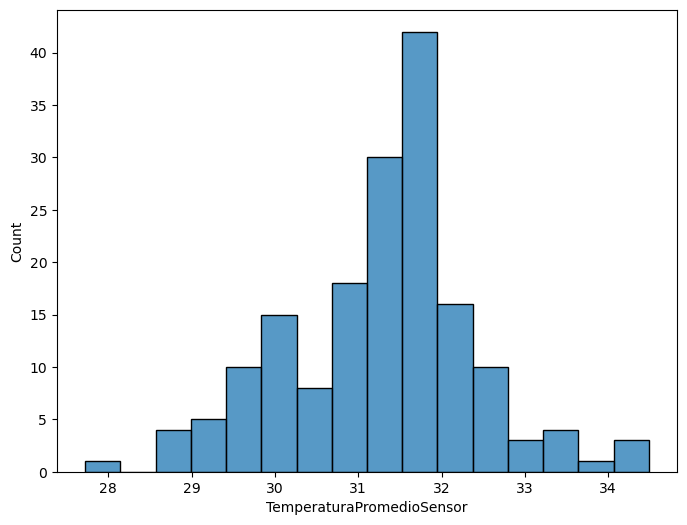

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=final_df, x='TemperaturaPromedioSensor')

<Axes: xlabel='HumedadPromedioSensor', ylabel='Count'>

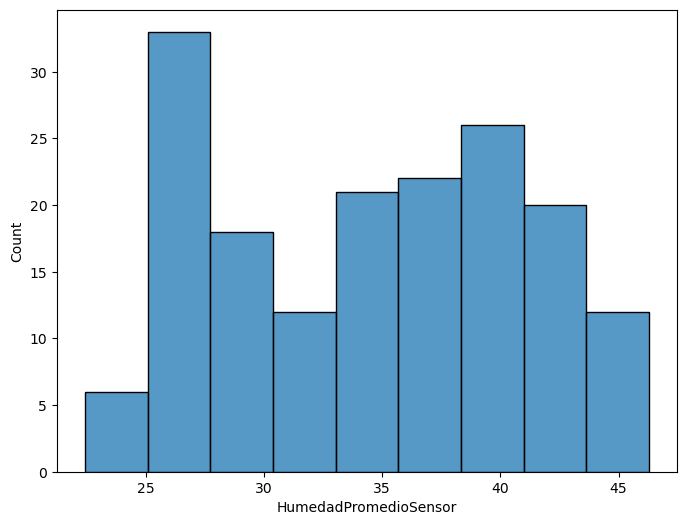

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=final_df, x='HumedadPromedioSensor')

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [21]:
x_sc = StandardScaler() ## almacenamos la función en un objeto
X_sc=x_sc.fit_transform(final_df)## estandarizamos

In [22]:
import scipy.cluster.hierarchy as sch

In [23]:
X_sc #data escalada

array([[-8.84141001e-01, -9.68885494e-02],
       [ 1.49619687e-01, -7.57118557e-01],
       [ 5.00301251e-02, -8.71322198e-01],
       [-9.77476326e-01, -8.51973638e-01],
       [-1.90863332e+00,  1.92816879e-01],
       [-3.16826933e+00,  1.70591416e-01],
       [-2.28563788e+00,  2.72703196e-02],
       [-1.87743746e+00, -1.82709337e-01],
       [ 5.12084824e-01,  1.19339568e-01],
       [ 7.20931152e-01, -8.82595147e-01],
       [ 1.25361722e+00, -1.13406862e+00],
       [ 1.78773021e+00, -1.25009327e+00],
       [ 1.96781805e+00, -1.42551770e+00],
       [ 2.57942786e+00, -1.40904185e+00],
       [ 7.91342547e-01, -1.38311407e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.27705752e-01, -1.32397444e+00],
       [ 5.

In [24]:
from sklearn.metrics import euclidean_distances, silhouette_score

In [25]:
from sklearn.cluster import AgglomerativeClustering   

Text(0.5, 1.0, 'Silouette para data status')

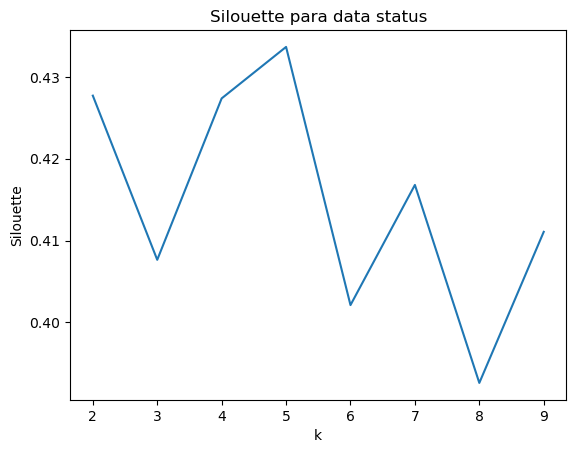

In [26]:
s = []

for n_clusters in range(2,10):
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                             linkage = 'ward')
    
    s.append(silhouette_score(X_sc, hc.fit_predict(X_sc)))#X_sc estandarizado

plt.plot(range(2, 10),s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data status")

In [27]:
import scipy.cluster.hierarchy as sch

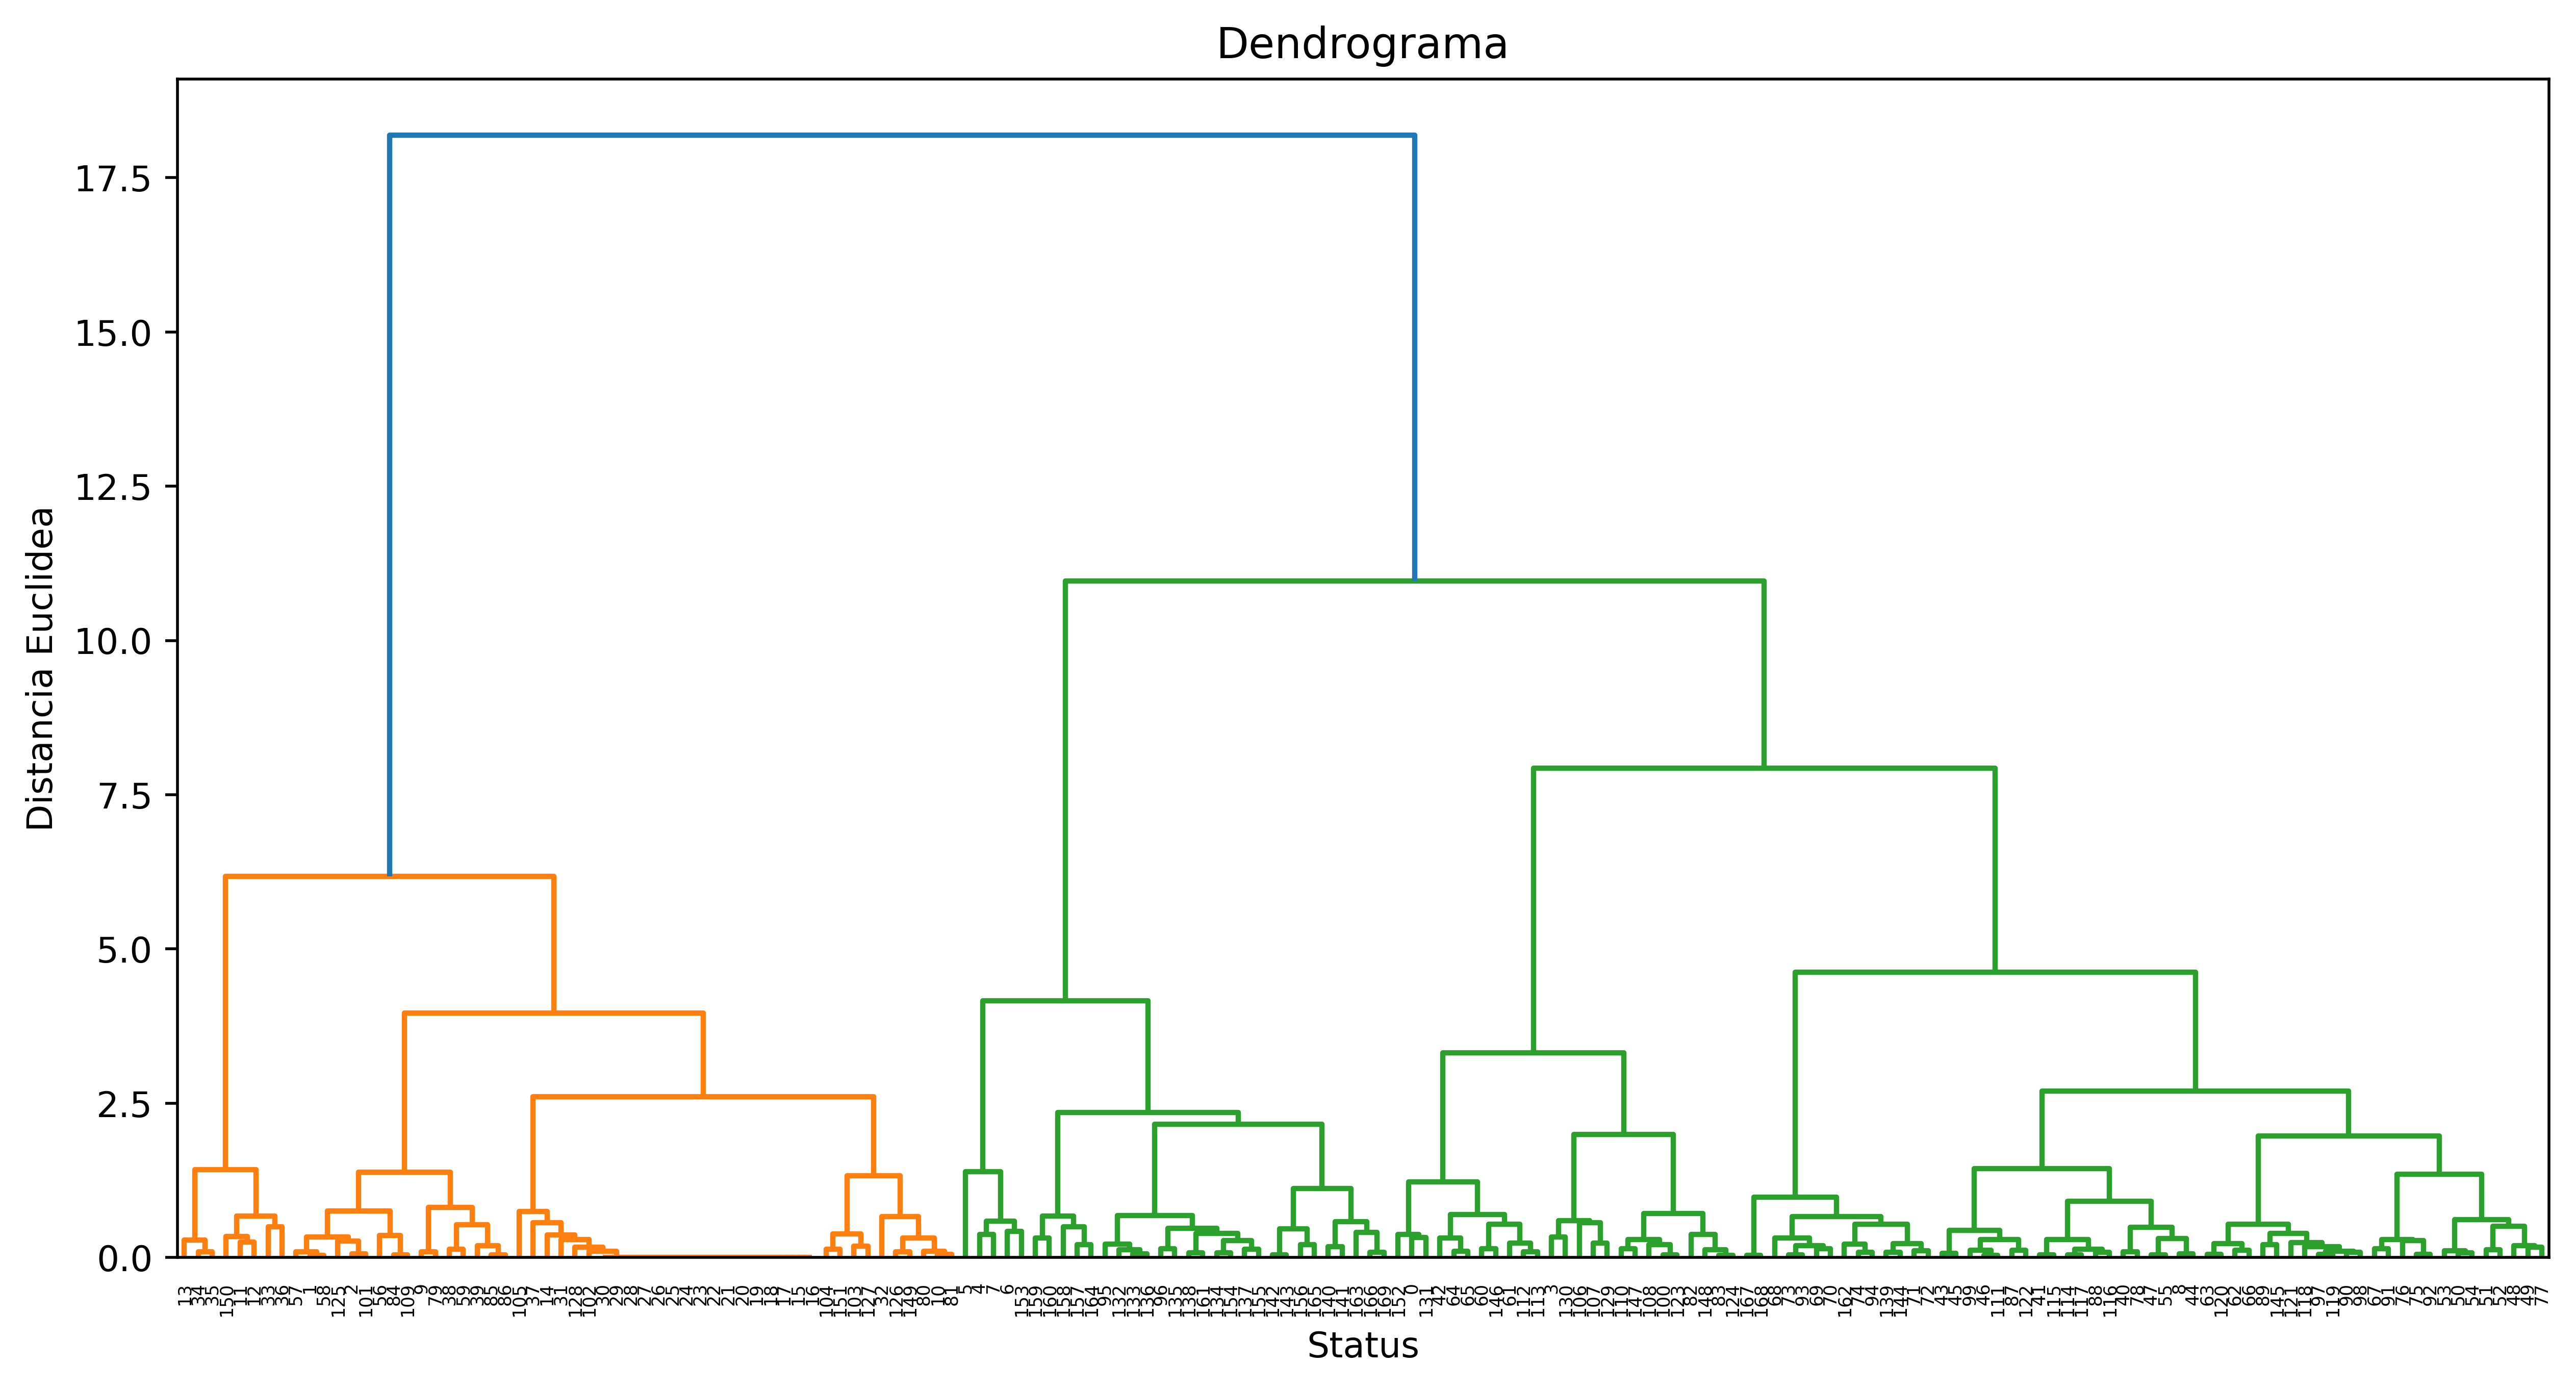

In [28]:
#definimos el dendograma, usaremos jerarquicos aglomerativos.
plt.figure(figsize=(12,6),dpi=500)
dendrogram = sch.dendrogram(sch.linkage(X_sc, metric = 'euclidean', method = 'ward')),#orientation='right') ## Usamos el método WARD para reducir la Var
plt.title('Dendrograma') ## asignamos nombre al título
plt.xlabel('Status')  ## asignamos nombre al eje x
plt.ylabel('Distancia Euclidea') ## asignamos nombre al eje y
plt.show() ## Visualizamos el plot

**Definamos el agrupamiento óptimo número final**

In [29]:
hc_final = AgglomerativeClustering(n_clusters = 6, 
                             linkage = 'ward')## realizamos la glusterización por ward, con 5 clusters
y_hc_final = hc_final.fit_predict(X_sc)## almacenamos en un objeto la clasificación de cada observación.

Veamos como quedaría los cluster de manera visual y veamos como estos se pueden describir.

In [30]:
df_resumen["Cluster"]=y_hc_final
df_resumen.head()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor,Cluster
6,2025-03-03 06:00:00,30.305028,33.865922,3
7,2025-03-03 07:00:00,31.472874,29.633685,1
8,2025-03-03 08:00:00,31.360367,28.901612,1
9,2025-03-03 09:00:00,30.199586,29.025641,3
10,2025-03-03 10:00:00,29.147653,35.723005,0


In [31]:
clust_map={
    0:"Cluster1",
    1:"Cluster2",
    2:"Cluster3",
    3:"Cluster4",
    4:"Cluster5",
    5:"Cluster6"
}
df_resumen.Cluster=df_resumen.Cluster.map(clust_map)

In [32]:
df_resumen.head()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor,Cluster
6,2025-03-03 06:00:00,30.305028,33.865922,Cluster4
7,2025-03-03 07:00:00,31.472874,29.633685,Cluster2
8,2025-03-03 08:00:00,31.360367,28.901612,Cluster2
9,2025-03-03 09:00:00,30.199586,29.025641,Cluster4
10,2025-03-03 10:00:00,29.147653,35.723005,Cluster1


In [33]:
df_resumen.groupby("Cluster").count()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor
Cluster,,,
Cluster1,31,31,31
Cluster2,48,48,48
Cluster3,44,44,44
Cluster4,25,25,25
Cluster5,8,8,8
Cluster6,14,14,14


In [34]:
cl_color={
    "Cluster1":"red",
    "Cluster2":"blue",
    "Cluster3":"green",
    "Cluster4":"cyan",
    "Cluster5":"magenta",
    "Cluster6":"black",    
}

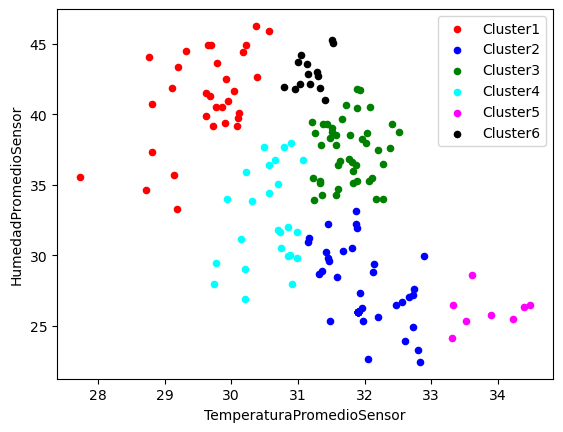

In [35]:
#graficamos los clusters
fig,ax= plt.subplots()
for clust in clust_map.values():
    color=cl_color[clust]
    df_resumen[df_resumen.Cluster==clust].plot(kind="scatter",x="TemperaturaPromedioSensor",y="HumedadPromedioSensor",label=clust,ax=ax,color=color)
    handles,labels=ax.get_legend_handles_labels() #Mostrar las etiquetas en el diseño
    _=ax.legend(handles,labels,loc="upper right") 

Mejorando el gráfico y su interpretación

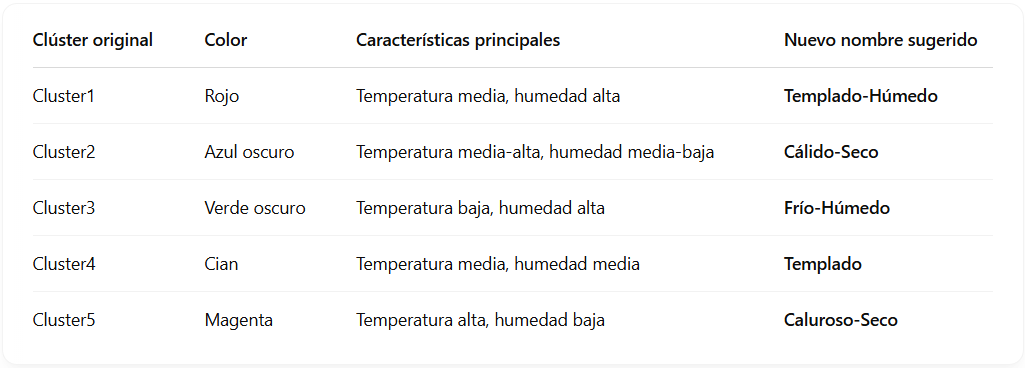

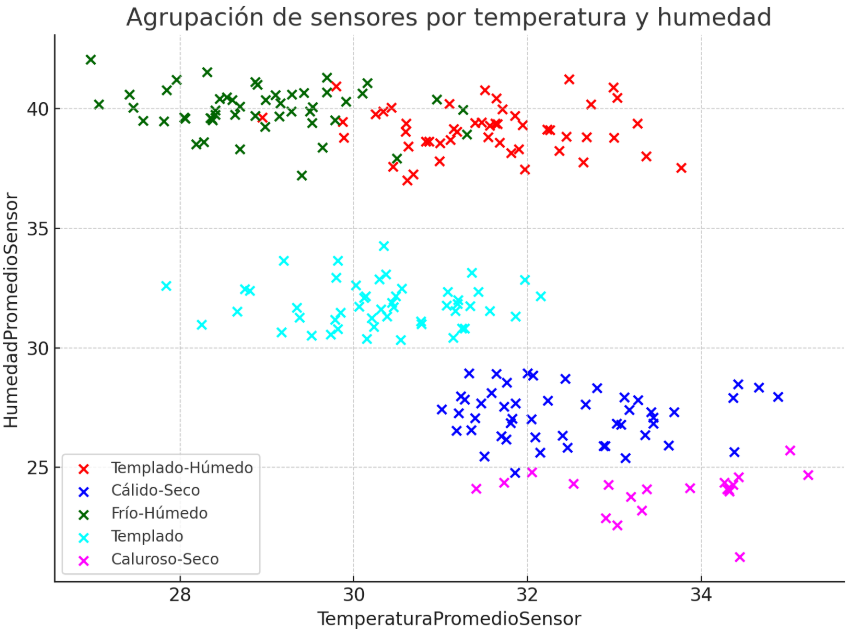

Aquí el gráfico actualizado con los nombres de clústeres modificados según sus características de temperatura y humedad:

Templado-Húmedo (rojo)

Cálido-Seco (azul)

Frío-Húmedo (verde)

Templado (cian)

Caluroso-Seco (magenta)

In [36]:
clust_map={
    "Cluster1":"Templado-Humedo",
    "Cluster2":"Calido-Seco",
    "Cluster3":"Frio-Humedo",
    "Cluster4":"Templado",
    "Cluster5":"Caluroso-Seco",
    "Cluster6":"Otro",
}
df_resumen.Cluster=df_resumen.Cluster.map(clust_map)

In [37]:
df_resumen.head()

,Fecha,TemperaturaPromedioSensor,HumedadPromedioSensor,Cluster
6,2025-03-03 06:00:00,30.305028,33.865922,Templado
7,2025-03-03 07:00:00,31.472874,29.633685,Calido-Seco
8,2025-03-03 08:00:00,31.360367,28.901612,Calido-Seco
9,2025-03-03 09:00:00,30.199586,29.025641,Templado
10,2025-03-03 10:00:00,29.147653,35.723005,Templado-Humedo


### Data Set Ajustes (Captura Manual)

In [38]:
df = pd.read_excel("Ajustes310325.xlsx")

In [39]:
df["Ajuste Realizado"].value_counts()

Ajuste Realizado
Sin Ajuste                                24
Aumento de extractor                       6
Aumento de inlets o apertura de fondo      4
Reducción de extractor                     4
Cambio a ciclos                            2
Reducción de inlets o sellado de fondo     2
Name: count, dtype: int64

In [40]:
df["Fecha"].value_counts()

Fecha
2025-03-12    7
2025-02-28    4
2025-03-05    4
2025-03-11    4
2025-03-17    4
2025-02-05    3
2025-02-02    2
2025-02-07    2
2025-02-11    2
2025-02-12    2
2025-02-18    2
2025-02-21    2
2025-03-01    2
2025-03-07    2
Name: count, dtype: int64

In [41]:
df['Fecha'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)

C:\Users\ascen\AppData\Local\Temp\ipykernel_17260\3003646645.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Fecha'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)


In [42]:
df["Fecha"].value_counts()

Fecha
2025-03-12    7
2025-02-28    4
2025-03-05    4
2025-03-11    4
2025-03-17    4
2025-02-05    3
2025-02-02    2
2025-02-07    2
2025-02-11    2
2025-02-12    2
2025-02-18    2
2025-02-21    2
2025-03-01    2
2025-03-07    2
Name: count, dtype: int64

In [43]:
x=df.iloc[:,[7,13]]
x.head()

,Temp IC (°C)-INIC,HR (%)-INIC
0,30.3,42.9
1,27.8,35.0
2,28.4,57.5
3,28.4,57.5
4,28.7,61.7


In [44]:
X_sc_=x_sc.fit_transform(x)## estandarizamos
X_sc_

array([[ 1.72753626, -0.89696772],
       [ 0.81326556, -1.88440597],
       [ 1.03269053,  0.92791816],
       [ 1.03269053,  0.92791816],
       [ 1.14240301,  1.45288534],
       [ 0.15499065,  0.21546272],
       [ 1.10583218, -0.97196303],
       [ 2.02010289, -1.92190363],
       [ 0.11841982, -1.72191613],
       [ 0.22813231, -1.18444974],
       [-0.1741468 , -1.14695209],
       [-0.06443432, -0.55948882],
       [-0.21071763,  0.11546897],
       [-1.01527585,  1.64037361],
       [-0.90556336,  1.86535954],
       [ 0.15499065,  1.06540957],
       [ 1.32525715, -0.29700524],
       [-1.41755496, -0.05952009],
       [-0.35700094,  1.50288221],
       [-0.4301426 ,  0.44044865],
       [-0.57642591,  0.76542833],
       [ 1.39839881, -0.17201305],
       [ 1.36182798, -0.10951696],
       [-0.06443432, -1.27194427],
       [ 0.33784479,  0.32795568],
       [ 0.04527817,  0.37795256],
       [ 0.11841982, -0.57198804],
       [ 0.84983639,  0.69043302],
       [ 0.44755728,

In [45]:
y_hc_final_ = hc_final.fit_predict(X_sc_)

In [46]:
df["Cluster"]=y_hc_final_
df.head()

,consec,Fecha,Granja,Caseta,Edad,Sistema Original,Ajuste Realizado,Temp IC (°C)-INIC,Temp IC (°C)- FIN,Dif SP (°C)-INIC,...,Temp BS (°C)-FIN,CO (ppm) MIN,CO (ppm) MAX,CO2 (ppm) MIN,CO2 (ppm) MAX,O2 (%) MIN,O2 (%) MAX,NH3 (ppm) MIN,NH3 (ppm) MAX,Cluster
0,1,2025-02-02,DAMS,Cta 1,8,Extractores solo temperatura,Sin Ajuste,30.3,32.9,0.5,...,30.6,0,0,1136,4572,19.5,20.9,0.0,0.0,3
1,2,2025-02-02,DAMS,Cta 1,8,Mínima + temperatura,Sin Ajuste,27.8,29.5,-1.7,...,29.8,0,0,404,2766,20.9,20.9,0.0,0.0,3
2,3,2025-02-05,GRQ 9,Cta 3,12,Solo temperatura,Cambio a ciclos,28.4,35.7,0.9,...,30.1,14,32,400,4446,19.3,20.9,0.0,0.0,0
3,4,2025-02-05,GRQ 9,Cta 3,12,Solo temperatura,Cambio a ciclos,28.4,35.7,0.9,...,30.1,14,32,400,4446,19.3,20.9,0.0,0.0,0
4,5,2025-02-05,GRQ 9,Cta 3,12,Después cambio a ciclos,Sin Ajuste,28.7,31.5,1.2,...,28.9,2,18,400,1995,20.9,20.9,0.0,0.0,0


In [47]:
clust_map={
    0:"Templado-Humedo",
    1:"Calido-Seco",
    2:"Frio-Humedo",
    3:"Templado",
    4:"Caluroso-Seco",
    5:"Otro"
}
df.Cluster=df.Cluster.map(clust_map)

In [48]:
df.head(100)

,consec,Fecha,Granja,Caseta,Edad,Sistema Original,Ajuste Realizado,Temp IC (°C)-INIC,Temp IC (°C)- FIN,Dif SP (°C)-INIC,...,Temp BS (°C)-FIN,CO (ppm) MIN,CO (ppm) MAX,CO2 (ppm) MIN,CO2 (ppm) MAX,O2 (%) MIN,O2 (%) MAX,NH3 (ppm) MIN,NH3 (ppm) MAX,Cluster
0,1,2025-02-02,DAMS,Cta 1,8,Extractores solo temperatura,Sin Ajuste,30.3,32.9,0.5,...,30.6,0,0,1136,4572,19.50,20.9,0.0,0.0,Templado
1,2,2025-02-02,DAMS,Cta 1,8,Mínima + temperatura,Sin Ajuste,27.8,29.5,-1.7,...,29.8,0,0,404,2766,20.90,20.9,0.0,0.0,Templado
2,3,2025-02-05,GRQ 9,Cta 3,12,Solo temperatura,Cambio a ciclos,28.4,35.7,0.9,...,30.1,14,32,400,4446,19.30,20.9,0.0,0.0,Templado-Humedo
3,4,2025-02-05,GRQ 9,Cta 3,12,Solo temperatura,Cambio a ciclos,28.4,35.7,0.9,...,30.1,14,32,400,4446,19.30,20.9,0.0,0.0,Templado-Humedo
4,5,2025-02-05,GRQ 9,Cta 3,12,Después cambio a ciclos,Sin Ajuste,28.7,31.5,1.2,...,28.9,2,18,400,1995,20.90,20.9,0.0,0.0,Templado-Humedo
5,6,2025-02-07,DAMS 5,Cta 1,13,Solo temperatura,Sin Ajuste,26.0,32.4,-1.2,...,29.6,0,0,952,4590,20.50,20.9,0.0,0.0,Calido-Seco
6,7,2025-02-07,DAMS 5,Cta 2,13,Ciclos + temperatura,Sin Ajuste,28.6,31.8,0.7,...,29.7,0,0,920,1688,20.70,20.9,0.0,0.0,Templado
7,8,2025-02-11,FML 3,Cta 4,6,Extractor túnel a 34.2°C,Sin Ajuste,31.1,36.6,1.0,...,33.8,0,0,403,895,20.60,20.9,0.0,0.0,Templado
8,9,2025-02-11,FML 5,Cta 5,4,Extractores túnel,Aumento de extractor,25.9,31.1,-4.6,...,30.7,0,0,401,592,20.90,20.9,0.0,0.0,Frio-Humedo
9,10,2025-02-12,DAMS 5,Cta 1,19,Solo temperatura,Sin Ajuste,26.2,28.5,0.7,...,28.3,0,0,589,4560,19.40,20.9,0.0,0.0,Frio-Humedo
